In [2]:
# load necessary libraries
import numpy as np
from scipy import ndimage
from scipy import misc
from scipy import stats
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
import matplotlib as mpl

# change plot size
mpl.rcParams['figure.figsize'] = (15, 15)

In [3]:
# read in an preprocess image
def readPrep(filename, plotIt, binaryThresh, smoothSigma):
    # read in image file
    let = misc.imread(filename)

    # read it in as grey
    grey1 = misc.imread(filename, flatten=True)
    grey = grey1.copy()

    # binarize
    if binaryThresh is not None:
        grey2 = grey1.copy()
        inds = grey2 > binaryThresh*255 
        grey2[inds] = 1
        grey2[np.logical_not(inds)] = 0
        grey = grey2.copy()

    # smooth
    if smoothSigma is not None:
        grey3 = ndimage.filters.gaussian_filter(input=grey, sigma=smoothSigma)
        grey = grey3.copy()
    
    if plotIt:        
        plt.imshow(let)
        plt.show()
        plt.imshow(grey1, cmap = plt.get_cmap('gray'))
        plt.show()
        plt.imshow(grey2, cmap = plt.get_cmap('gray'))
        plt.show()
        plt.imshow(grey3, cmap=plt.get_cmap('gray'))
        plt.show()
    return let, grey

# plot "histogram"
def densityHist(rowSums, pers):
    plt.plot(rowSums)
    ny = rowSums.shape[0]
    for pe in pers:
        p = np.percentile(rowSums, pe)
        plt.plot([0,ny], [p, p])
        plt.text(x=ny, y=p, s=str(pe))
    plt.text
    mpl.text.Text(200, 200, 'lovely')
    plt.show()

# get locations of the large drops using different cutoffs
def get_cutoffs(thresh, proj):
    linebreaks = []
    linebreaks2 = []
    above = False
    curmin = np.inf
    mindex = 0
    ny = proj.shape[0]
    for i in range(ny):
        curabove = proj[i] > thresh
        # method one - get the max of the region above
        if not above:
            if curabove:
                curmax = proj[i]
                maxdex = i
        else:
            if curabove:
                if grey_y[i] > curmax:
                    curmax = proj[i]
                    maxdex = i
            else:
                linebreaks.append(maxdex)
                curmax = np.inf

        # method 2 - get the center of the gap
        if not above and curabove:
            startloc = i
        if above and not curabove:
            linebreaks2.append(np.floor(np.mean([startloc, i])))

        above = curabove
    return linebreaks
        

# plot with the lines
def plotLines(img, breaks, y = True):
    plt.imshow(img)
    for i in range(len(breaks)):
        if y:
            plt.plot([0,img.shape[1]], [breaks[i], breaks[i]], 'b')
        else:
            plt.plot([breaks[i], breaks[i]], [0,img.shape[0]], 'b')
    plt.show()

def plotBoxes(img, linebreaks, wordbreaks):
    plt.imshow(img)
    for i in range(len(linebreaks)):
        plt.plot([0,img.shape[1]], [linebreaks[i], linebreaks[i]], 'b')
    for i in range(len(linebreaks)-1):
        plt.plot([wordbreaks[i], wordbreaks[i]], [linebreaks[i], linebreaks[i+1]], 'b')
#         for j in range(len(wordbreaks[i])):
#             plt.plot([wordbreaks[i][j], wordbreaks[i][j]], [linebreaks[i-1], linebreaks[i]], 'b')
    plt.show()

# now try to split into words
def getWordBreaks(breaks, img, mypercent = 70, let = None):
    wordbreaks = []
    for i in range(len(breaks)-1):
        chunk = img[breaks[i]:breaks[i+1],]
        chunk_x = np.sum(chunk, 0)
        wordbreaks.append(argrelextrema(chunk_x, np.greater)[0])
        
#         wordbreaks.append(get_cutoffs(np.percentile(chunk_x, mypercent), chunk_x))
        # plot with the lines
        if not let == None:
            plt.imshow(chunk, cmap=plt.get_cmap('gray'))
            plt.show()
            densityHist(rowSums=chunk_x, pers = [mypercent])
            plotLines(let[breaks[i]:breaks[i+1],], wordbreaks, y = False)
    return wordbreaks

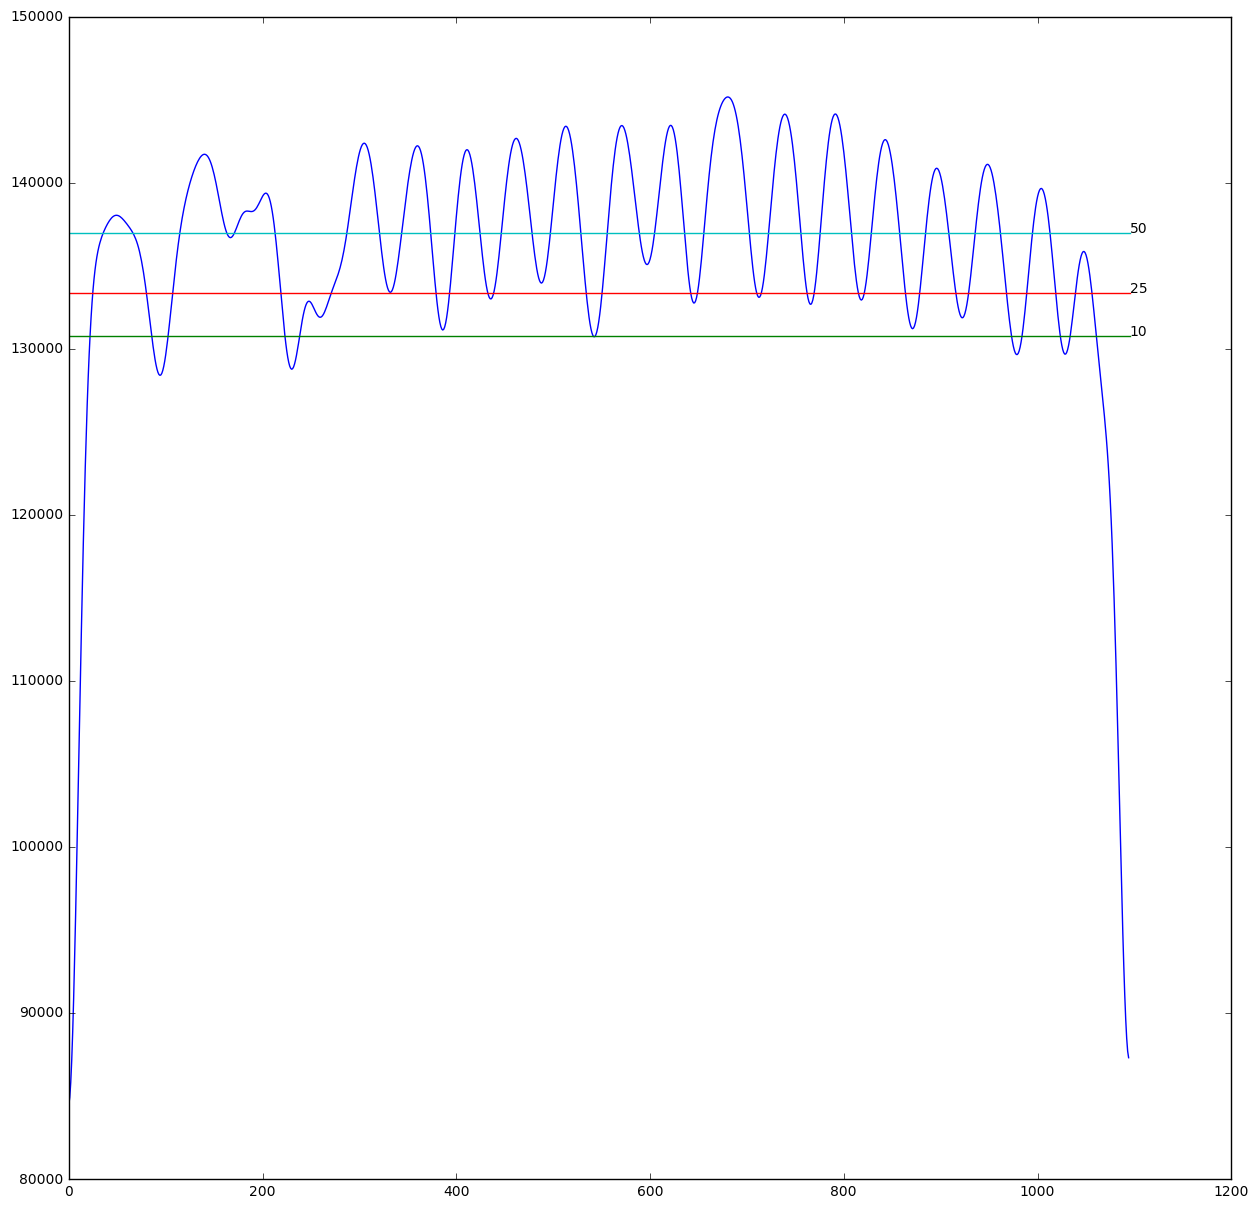

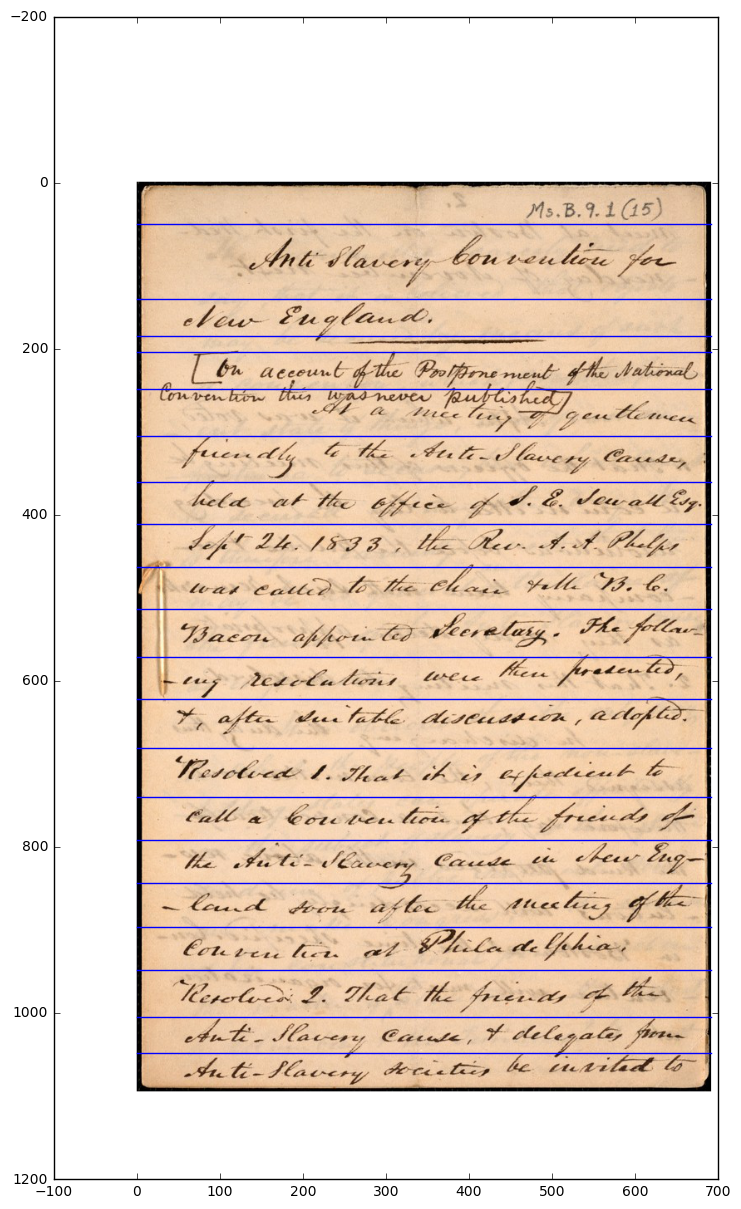

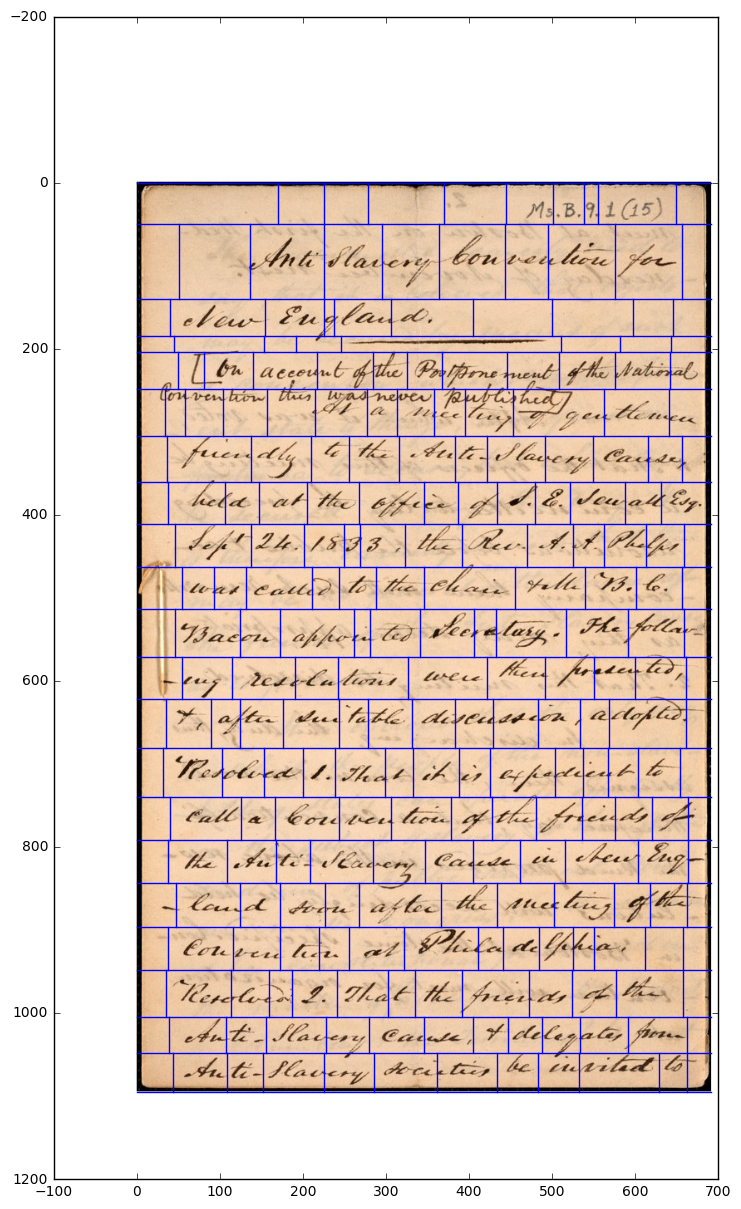

In [4]:
# do everything for the easy image
let, grey = readPrep(filename='images/easy.jpg', plotIt=False, binaryThresh=None, smoothSigma=10.0)
grey_y = np.sum(grey, 1) # get rows as sum
densityHist(rowSums=grey_y, pers=[10, 25, 50]) # plot "histogram"
linebreaks = argrelextrema(grey_y, np.greater) # get local maxima from data
plotLines(img=let, breaks=linebreaks) # plot it all

# get wordbreaks
breaks = linebreaks[0].copy()
breaks = np.insert(breaks, 0, 0)
breaks = np.append(breaks, grey.shape[0])
wordbreaks = getWordBreaks(breaks, grey)
plotBoxes(let, breaks, wordbreaks)

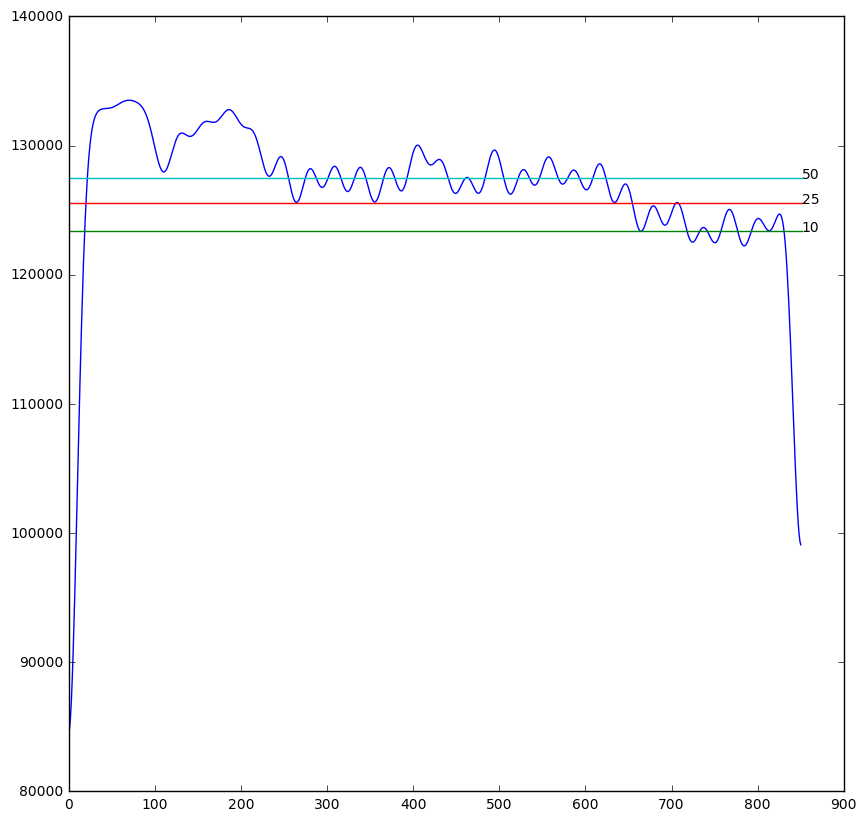

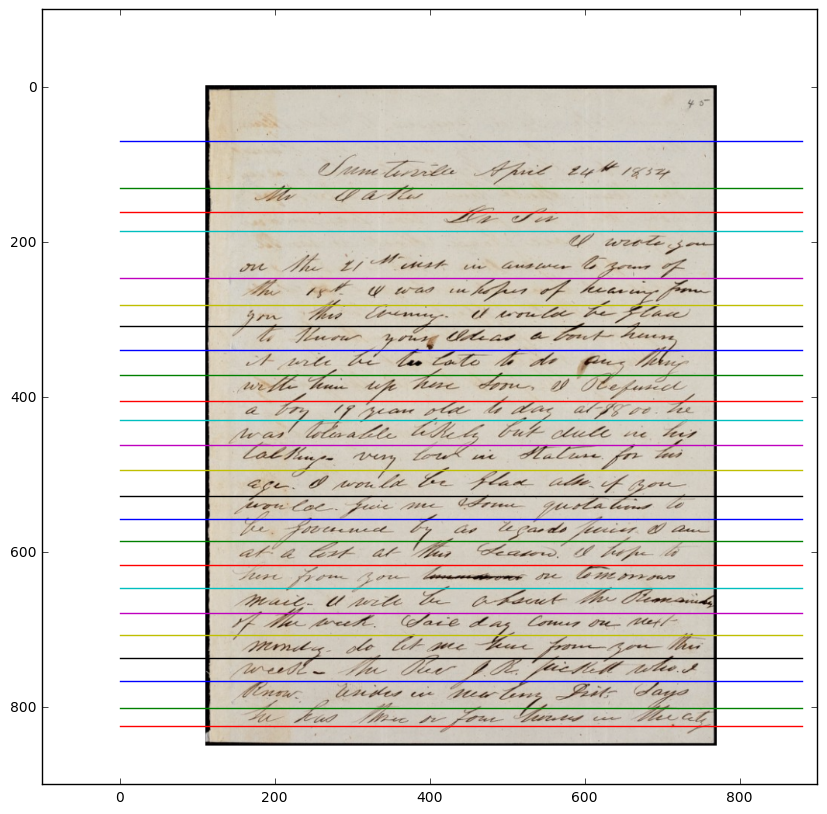

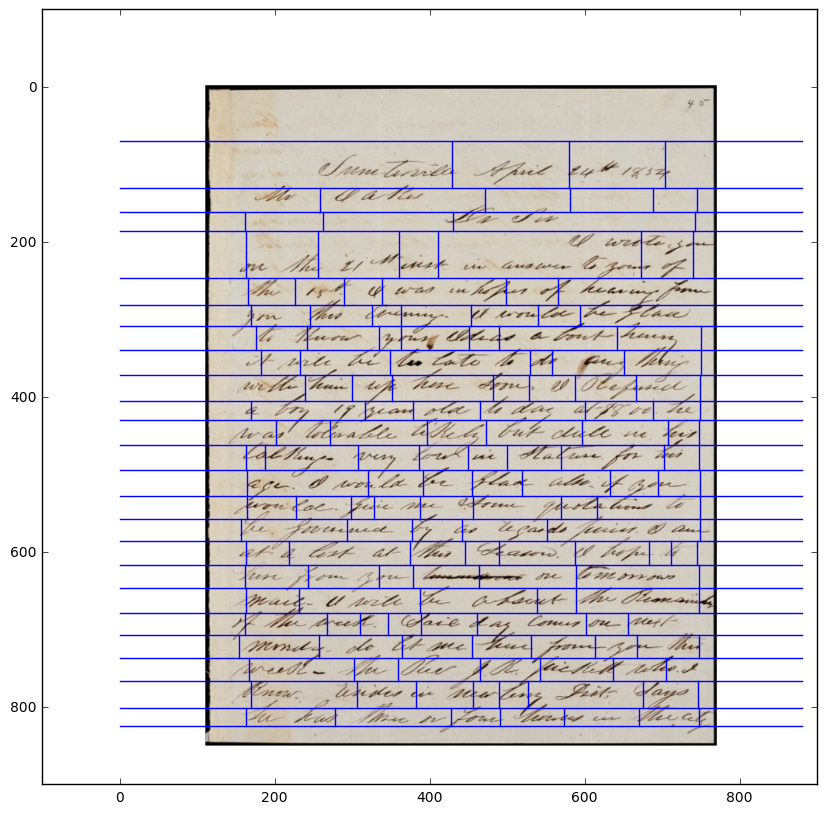

In [9]:
# do everything for the easy image
let, grey = readPrep(filename='images/medium.png', plotIt=False, binaryThresh=None, smoothSigma=10.0)
grey_y = np.sum(grey, 1) # get rows as sum
densityHist(rowSums=grey_y, pers=[10, 25, 50]) # plot "histogram"
linebreaks = argrelextrema(grey_y, np.greater) # get local maxima from data
plotLines(img=let, breaks=linebreaks) # plot it all

# get wordbreaks
breaks = linebreaks[0].copy()
breaks = np.insert(breaks, 0, 0)
breaks = np.append(breaks, grey.shape[0])
wordbreaks = getWordBreaks(breaks, grey)
plotBoxes(let, linebreaks[0], wordbreaks)